<a href="https://colab.research.google.com/github/Sid-Oya/DS-Unit-1-Sprint-2-Statistics/blob/master/Sidoney_Daley_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
column_headers = ['Class Name', 'handicapped-infants:', ' water-project-cost-sharing:', 'adoption-of-the-budget-resolution:', 'physician-fee-freeze:',
'el-salvador-aid:', 'religious-groups-in-schools:', 'anti-satellite-test-ban:', 'aid-to-nicaraguan-contras:', 'mx-missile:', 'immigration:', 
'synfuels-corporation-cutback:', 'education-spending:', 'superfund-right-to-sue:', 'crime:', 'duty-free-exports:', 'export-administration-act-south-africa:' ]
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
pp = pd.read_csv(url, header=None, names=column_headers, na_values='?')
pp.head()

,Class Name,handicapped-infants:,water-project-cost-sharing:,adoption-of-the-budget-resolution:,physician-fee-freeze:,el-salvador-aid:,religious-groups-in-schools:,anti-satellite-test-ban:,aid-to-nicaraguan-contras:,mx-missile:,immigration:,synfuels-corporation-cutback:,education-spending:,superfund-right-to-sue:,crime:,duty-free-exports:,export-administration-act-south-africa:
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
pp = pp.replace({'y':1, 'n':0})
pp = pp.dropna()
pp.head()

,Class Name,handicapped-infants:,water-project-cost-sharing:,adoption-of-the-budget-resolution:,physician-fee-freeze:,el-salvador-aid:,religious-groups-in-schools:,anti-satellite-test-ban:,aid-to-nicaraguan-contras:,mx-missile:,immigration:,synfuels-corporation-cutback:,education-spending:,superfund-right-to-sue:,crime:,duty-free-exports:,export-administration-act-south-africa:
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:
import matplotlib.pyplot as plt


In [0]:
import scipy.stats as stats

In [0]:
from scipy.stats import chisquare 

In [0]:
from scipy.stats import normaltest

In [0]:
import scipy.stats as stats

In [0]:
def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1) # just looking up the corresponding t-stat.
    return (mean, mean - moe, mean + moe)

In [0]:
pp.shape


(232, 17)

In [0]:
pp['handicapped-infants:'].mean()

0.41379310344827586

In [0]:
conf_int=stats.t.interval(0.95, 
                          pp.shape[0],
                          loc = pp['handicapped-infants:'].mean(),
                          scale = stats.sem(pp['handicapped-infants:'])
                          )
conf_int

(0.3499475502134004, 0.4776386566831513)

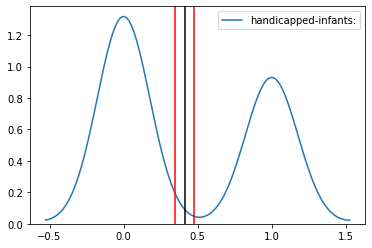

In [0]:
sns.kdeplot(pp['handicapped-infants:'])
plt.axvline(x=conf_int[0], color='red')
plt.axvline(x=conf_int[1], color='red')
plt.axvline(x=pp['handicapped-infants:'].mean(), color='k');

In [0]:
pp['export-administration-act-south-africa:'].mean()

0.8146551724137931

In [0]:
conf_int=stats.t.interval(0.95, 
                          pp.shape[0],
                          loc = pp['export-administration-act-south-africa:'].mean(),
                          scale = stats.sem(pp['export-administration-act-south-africa:'])
                          )
conf_int

(0.7642829962247557, 0.8650273486028306)

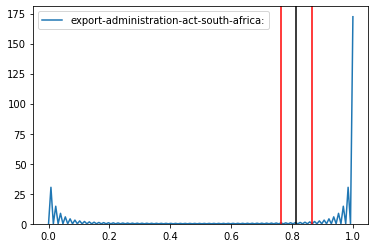

In [0]:
sns.kdeplot(pp['export-administration-act-south-africa:'])
plt.axvline(x=conf_int[0], color='red')
plt.axvline(x=conf_int[1], color='red')
plt.axvline(x=pp['export-administration-act-south-africa:'].mean(), color='k');

In [0]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic. head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [0]:
titanic.describe

<bound method NDFrame.describe of      Survived  Pclass     Sex   Age     Fare     Embarked
0           0       3    male  22.0   7.2500  Southampton
1           1       1  female  38.0  71.2833    Cherbourg
2           1       3  female  26.0   7.9250  Southampton
3           1       1  female  35.0  53.1000  Southampton
4           0       3    male  35.0   8.0500  Southampton
..        ...     ...     ...   ...      ...          ...
707         0       3  female  39.0  29.1250   Queenstown
708         0       2    male  27.0  13.0000  Southampton
709         1       1  female  19.0  30.0000  Southampton
710         1       1    male  26.0  30.0000    Cherbourg
711         0       3    male  32.0   7.7500   Queenstown

[712 rows x 6 columns]>

In [0]:
titanic.describe(exclude='number')

,Sex,Embarked
count,712,712
unique,2,3
top,male,Southampton
freq,453,554


In [0]:
cut_points = [0, 1, 2, 3]
label_names = ['1', '2', '3']
titanic['Pclass_categories'] = pd.cut(titanic['Pclass'], cut_points, labels=label_names)

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Pclass_categories
0,0,3,male,22.0,7.2500,Southampton,3
1,1,1,female,38.0,71.2833,Cherbourg,1
2,1,3,female,26.0,7.9250,Southampton,3
3,1,1,female,35.0,53.1000,Southampton,1
4,0,3,male,35.0,8.0500,Southampton,3


In [0]:
titanic['Sex'].value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [0]:
titanic['Pclass_categories'].value_counts()

3    355
1    184
2    173
Name: Pclass_categories, dtype: int64

In [0]:
titanic = titanic.sort_values(by='Pclass_categories', ascending=True)

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Pclass_categories
580,1,1,female,29.00,211.3375,Southampton,1
242,1,1,male,0.92,151.5500,Southampton,1
243,1,1,female,17.00,108.9000,Cherbourg,1
245,1,1,female,30.00,56.9292,Cherbourg,1
246,1,1,female,24.00,83.1583,Cherbourg,1


In [0]:
contingency_table = pd.crosstab(titanic['Survived'], titanic['Pclass_categories'], margins=True)

contingency_table

Pclass_categories,1,2,3,All
Survived,,,,
0,64,90,270,424
1,120,83,85,288
All,184,173,355,712


In [0]:
nscount = contingency_table.iloc[0][0:3].values
nscount

array([ 64,  90, 270])

In [0]:
scount = contingency_table.iloc[1][0:3].values
scount

array([120,  83,  85])

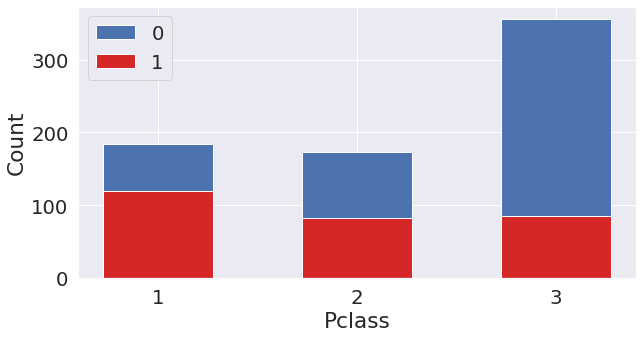

In [0]:
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["1","2","3"]
p1 = plt.bar(categories, scount, 0.55, color='#d62728')
p2 = plt.bar(categories, nscount, 0.55, bottom=scount)
plt.legend((p2[0], p1[0]), ('0', '1'))
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

In [0]:
row_sums = contingency_table.iloc[0:2, 3].values
col_sums = contingency_table.iloc[2, 0:3].values

print(row_sums)
print(col_sums)

[424 288]
[184 173 355]


In [0]:
total = contingency_table.loc['All','All']
total

712

In [0]:
titanic.shape[0]

712

In [0]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 3)
[[109.57303371 103.02247191 211.40449438]
 [ 74.42696629  69.97752809 143.59550562]]


In [0]:
observed = pd.crosstab(titanic['Survived'], titanic['Pclass_categories']).values
print(observed.shape)
observed

(2, 3)


array([[ 64,  90, 270],
       [120,  83,  85]])

In [0]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 91.08074548791019


In [0]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")   

Degrees of Freedom: 2


In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 91.08074548791019
P-value: 1.6675060315554636e-20
Degrees of Freedom: 2
Expected: 
 [[109.57303371 103.02247191 211.40449438]
 [ 74.42696629  69.97752809 143.59550562]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)